## Observations and Insights 

## Part 0: Dependencies and reading the data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## Part 1: Merge and display the study data files

In [3]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Part 2: Check number of mice and drop duplicate entries (Mouse ID & Timepoint entries). 

In [4]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_idx = merged_df[['Mouse ID','Timepoint']].duplicated()

len(merged_df[duplicated_idx])

5

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'], keep = 'first')

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df.shape, merged_df.shape

((1888, 8), (1893, 8))

## Part 3: Summary Statistics

In [9]:
# Defining functions for the summary statistics

# Mean
def get_mean(df):
    return round((df.mean()), 2)
# Median
def get_median(df):
    return round((df.median()), 2)
# Standadr Deviation
def get_std(df):
    return round((df.std()), 2)
# Variance
def get_variance(df):
    return round((df.var()), 2)
# Standard Error of the mean
def get_sem(df):
    return round((df.sem()), 2)

In [10]:
# Use groupby and summary statistical methods to calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen: 

# Groupby
drug_regimens = clean_df.groupby('Drug Regimen')

In [11]:
# Create variables for the required summary statistics and compute them using the functions defined 2 cells up
means_tumor = drug_regimens['Tumor Volume (mm3)'].apply(get_mean)
median_tumor = drug_regimens['Tumor Volume (mm3)'].apply(get_median)
variance_tumor = drug_regimens['Tumor Volume (mm3)'].apply(get_variance)
std_tumor = drug_regimens['Tumor Volume (mm3)'].apply(get_std)
std_error_tumor = drug_regimens['Tumor Volume (mm3)'].apply(get_sem)

In [12]:
# Assemble the resulting series into a single summary dataframe.
dict1 = {'Mean': means_tumor,
        'Median': median_tumor,
        'Variance': variance_tumor,
        'Standard deviation': std_tumor,
        'SEM': std_error_tumor}

summary_df = pd.DataFrame(dict1)
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
dataframe_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([get_mean, get_median, get_variance, get_std, get_sem])
dataframe_stats.columns = ['Mean', 'Median', 'Variance', 'Standard deviation', 'SEM']
dataframe_stats.head()

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Part 4: Bar and Pie Charts

### Bar Charts

Text(0, 0.5, 'Number of Measurements')

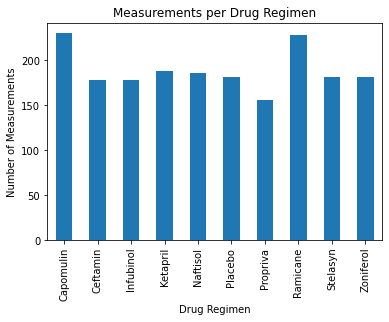

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create an empty dictionary
dict2 = {}

# Create a list of the drug regimens
drugs = list(drug_regimens.groups.keys())

# For every drug (key), assign the number of rows encountered as the count i.e. numbe rof measurements
for drug in drugs:
    dict2[drug] = drug_regimens.get_group(drug)['Mouse ID'].count()
dict2

# Generate bar plot plot with pandas
drug_regimens.count()['Timepoint'].plot.bar()
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

Text(0, 0.5, 'Number of Measurements')

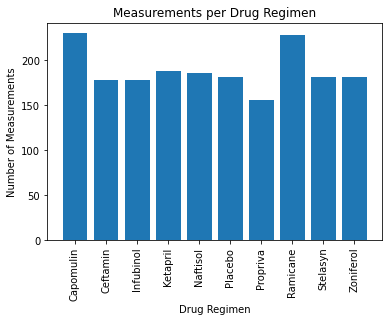

In [15]:
# Same chart with pyplot

plt.bar(dict2.keys(), dict2.values())
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Measurements")

### Pie Charts

In [16]:
# Generate a pie plot showing the distribution of female versus male mice
clean_df.groupby('Mouse ID').size()
df  = clean_df.drop_duplicates('Mouse ID', keep = 'first')
def label_function(val):
    return f'{val / 100 * len(df):.2f}\n{val:.2f}%'

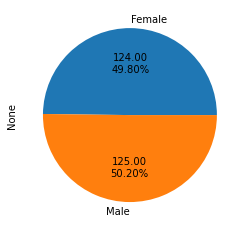

In [17]:
# Result using pandas
clean_df.drop_duplicates('Mouse ID', keep = 'first').groupby('Sex').size().plot(kind = 'pie', autopct = label_function)

([<matplotlib.patches.Wedge at 0x242d7cd75c0>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '125.00\n50.20%'),
  Text(0.00378500507823574, -0.5999880613283548, '124.00\n49.80%')])

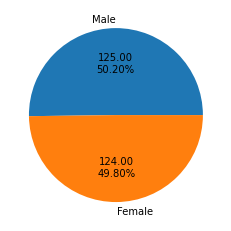

In [18]:
# Result using pyplot
plt.pie(x = df['Sex'].value_counts(),autopct = label_function, labels = ['Male', 'Female'])

## Part 5: Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse for Capomulin, Ramicane, Infubinol, and Ceftamin

In [19]:
# Getting the last (greatest) timepoint for each mouse
def get_max(df):
    return((df.sort_values('Timepoint', ascending = True).iloc[-1]['Tumor Volume (mm3)']))


max_timepoints = {}
for drug in ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']:
    
    max_timepoints[drug] = (drug_regimens.get_group(drug).groupby('Mouse ID').apply(get_max))

max_timepoints
max_timepoints_df = pd.DataFrame(max_timepoints)
max_timepoints_df['Mouse ID'] = max_timepoints_df.index

In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merged_df = pd.merge(clean_df , max_timepoints_df, on = 'Mouse ID')

In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
outliers_max = {}
outliers_min = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    data = new_merged_df.groupby('Drug Regimen').get_group(treatment)
    iqr = data[treatment].quantile(0.75) - data[treatment].quantile(0.25)
    max_out = (1.5 * iqr) + data[treatment].quantile(0.75)
    #print(max_out)
    min_out = data[treatment].quantile(0.25) - (1.5 * iqr) 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    tumor_vol_data.append(data[treatment])
    
    # using subset to calculate iqr and upper and middle bounds
    iqr = data[treatment].quantile(0.75) - data[treatment].quantile(0.25)
    max_out = (1.5 * iqr) + data[treatment].quantile(0.75)
    #print(max_out)
    min_out = data[treatment].quantile(0.25) - (1.5 * iqr) 
    
    
    # Determine outliers using upper and lower bounds
    def get_outliers(df):
        return(df.loc[df[treatment] > max_out])
    def get_outliers2(df):
        return(df.loc[df[treatment] < min_out])
    # The tumor volume data of maximum timepoint is the index
    
    outliers_max[treatment] = data.groupby('Mouse ID').apply(get_outliers)
    
    outliers_min[treatment] = data.groupby('Mouse ID').apply(get_outliers2)

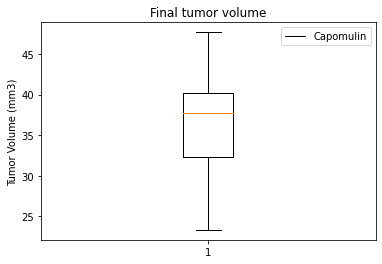

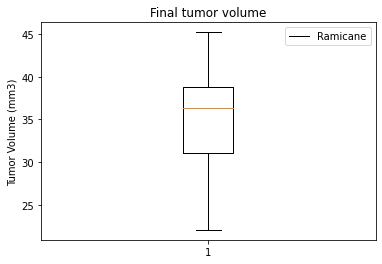

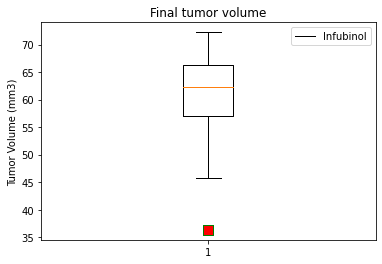

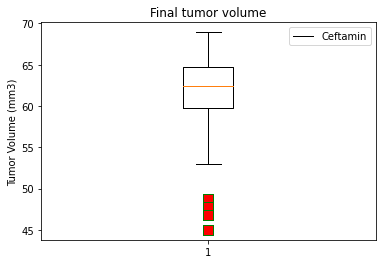

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest (pyplot)
regiments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

for drug in regiments:
    # Outlier marker: square, red, size 10
    flierprops = dict(marker='s', markerfacecolor='r', markersize=10, linestyle='none', markeredgecolor='g')
    plt.boxplot(new_merged_df.groupby('Drug Regimen').get_group(drug)[drug], flierprops=flierprops)
    plt.legend([drug])
    plt.title("Final tumor volume")
    plt.ylabel("Tumor Volume (mm3)")

    plt.show()

## Part 6: Line and Scatter Plots

### Line Plot

t565


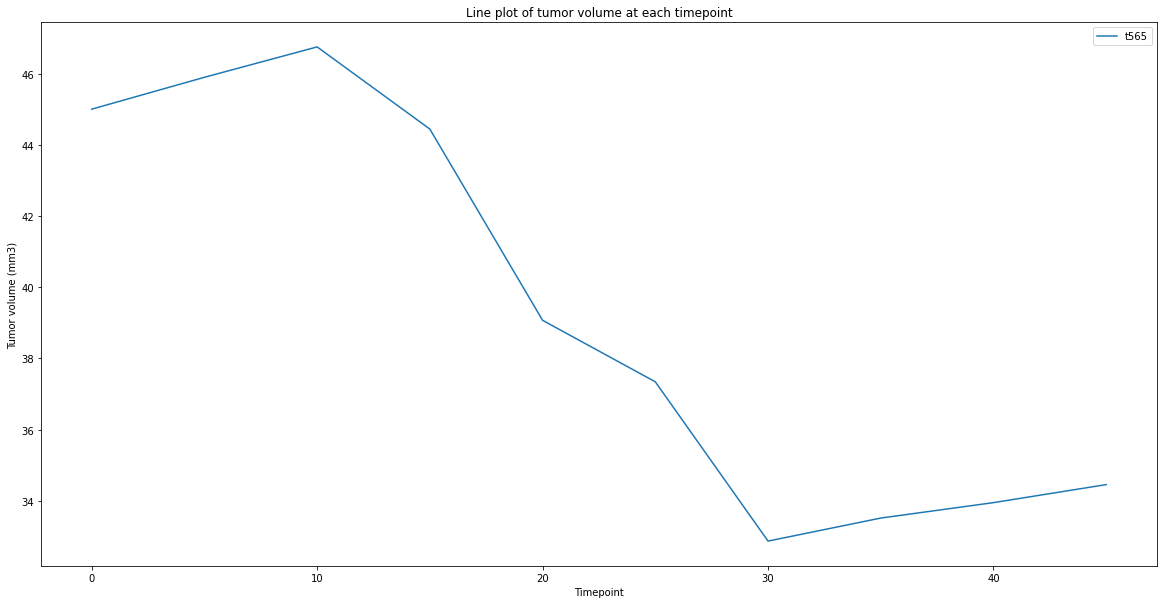

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get rows where drug is regimen
capo = drug_regimens.get_group('Capomulin')

# Group the above subset by Mouse ID
id_s  = capo.groupby('Mouse ID')

# Create list of mice in id_s
mice = list(id_s.groups.keys())

# Choose a mouse randomly form the mice list
mouse_to_use = random.choice(mice)
print(mouse_to_use)

plt.figure(figsize = (20,10))
#for mouse in list(mice):
plt.plot(id_s.get_group(mouse_to_use)['Timepoint'],id_s.get_group(mouse_to_use)['Tumor Volume (mm3)'])
plt.title("Line plot of tumor volume at each timepoint")
plt.xlabel('Timepoint')
plt.ylabel('Tumor volume (mm3)')
plt.legend([mouse_to_use])
#capo['Tumor Volume (mm3)']

### Scatter Plot

Text(0, 0.5, 'Average Tumor volume')

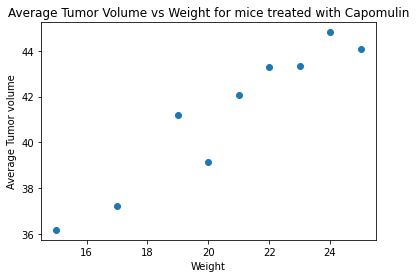

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group the capo subset by Weight
weight = capo.groupby('Weight (g)')

# Determine average weight
average_weight = pd.DataFrame(weight['Tumor Volume (mm3)'].mean())

# Set the x and y variables for the scatter appropriately
x = average_weight.index
y = average_weight['Tumor Volume (mm3)']

# Create scatter plot
plt.scatter(average_weight.index,average_weight['Tumor Volume (mm3)'],)
plt.title('Average Tumor Volume vs Weight for mice treated with Capomulin')
plt.xlabel('Weight')
plt.ylabel('Average Tumor volume')

## Part 7: Correlation and Regression

### Correlation

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Correlation Coefficient
print(r_value)

0.950524396185527


### Regression

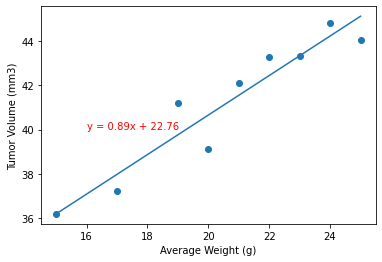

In [26]:
# Generating the regression plot
plt.scatter(x, y)
plt.plot(x,slope * x + intercept)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# All labels
plt.xlabel('Tumor Volume vs Average Weight for mice on Capomulin')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(16,40), fontsize=10, color="red")

plt.show()